# 库导入

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn import tree
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

# sns.set_style("whitegrid")

# 图片字体及显示设置
config = {
    "font.family":'serif',      # sans-serif/serif/cursive/fantasy/monospace
    "font.size": 8,             # medium/large/small
    'font.style':'normal',      # normal/italic/oblique
    'font.weight':'normal',     # bold
    "mathtext.fontset":'cm',    # cm(Computer Modern)
    "font.serif": ['cmb10'],    # Simsun:宋体
    "axes.unicode_minus": False,# 正常显示负号
}
plt.rcParams.update(config)     # 更新plt的基础设置

# 数据读取与分析

In [3]:
# 数据集读取
iris = load_iris()
x_total = iris['data']          # 获取数据
y_total = iris['target']        # 花的标签（0，1，2）
feature_name = iris['feature_names']   # 数据集特征名  获取数据特征的名字 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
label_name = iris['target_names']      # 数据集标签名  'setosa' 'versicolor' 'virginica'
print(pd.DataFrame(x_total).head())
print(y_total)
print(label_name)

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [4]:
# 数据可视化
x_sepal = x_total[:, :2]    # 萼片长、宽特征  list[index,colmuns]
print(x_sepal)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

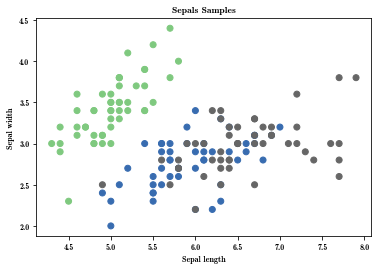

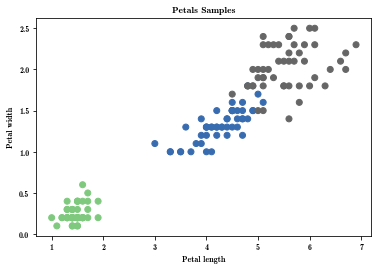

In [5]:
plt.scatter(x=x_sepal[:, 0], y=x_sepal[:, 1], c=y_total, cmap=plt.cm.Accent)   # x轴：x_sepal[:, 0] y轴：x_sepal[:, 1] c:颜色分类
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepals Samples')
plt.show()
 
x_petal = x_total[:, 2:4]   # 花瓣长、宽特征
plt.scatter(x_petal[:, 0], x_petal[:, 1], c=y_total, cmap=plt.cm.Accent)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petals Samples')
plt.show()

In [6]:
a =  y_total.reshape(-1, 1)     # -1 即负数 代表的就是二维的意思，多少行并不知道，这需要(x,y) 和 total 元素确定，x = total/y total 一定要整除y 不然无法转换 
a

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [7]:
# 基本统计特征分析
# 1.基于numpy函数进行分析
# print("numpy函数: ")
# print("特征名: ", feature_name)
# print("均值:   ", np.mean(x_total, 0))  # 均值
# print("标准差: ", np.std(x_total, 0))   # 标准差
# print("方差:   ", np.var(x_total, 0))   # 方差
# print("最小值: ", np.min(x_total, 0))   # 最小值
# print("最大值: ", np.max(x_total, 0))   # 最大值
# 2. pandas函数
# np.concatenate 是numpy中对array进行拼接的函数 (x_total, y_total.reshape(-1, 1))需要拼接的矩阵 axis=1 行拼接 
x_df = pd.DataFrame(np.concatenate((x_total, y_total.reshape(-1, 1)), axis=1), columns=feature_name + ["species"])
# print("DataFrame函数:")
# print(x_df.head())
# print(x_df.describe())

In [8]:
print(x_df.head())     # 萼片:sepal 花瓣:petal

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


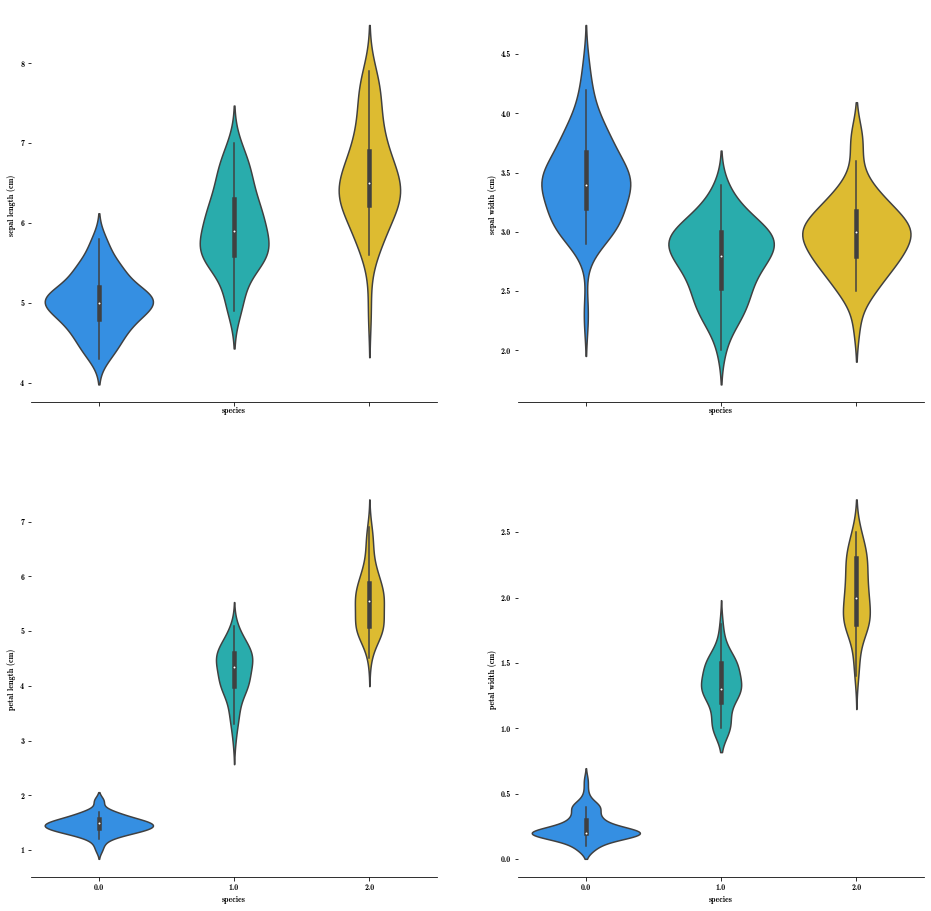

In [9]:
# 关联性分析
# 特征与label关联性
colors = ['#1890FF', '#13C2C2', '#FACC14', '#223273', '#8543E0', '#2FC25B', '#3436c7', '#F04864'] 
f, axes = plt.subplots(2, 2, figsize=(16, 16), sharex=True)       # 返回一个2x2=4的个图的子图  figsize(x,y) 代表每个子图的大小
sns.despine(left=True)

sns.violinplot(x='species', y='sepal length (cm)', data=x_df, palette=colors, ax=axes[0, 0])        # x=df的的列名，y=df中的列名  类型和特征的关系
sns.violinplot(x='species', y='sepal width (cm)', data=x_df, palette=colors, ax=axes[0, 1])
sns.violinplot(x='species', y='petal length (cm)', data=x_df, palette=colors, ax=axes[1, 0])
sns.violinplot(x='species', y='petal width (cm)', data=x_df, palette=colors, ax=axes[1, 1])

plt.show()

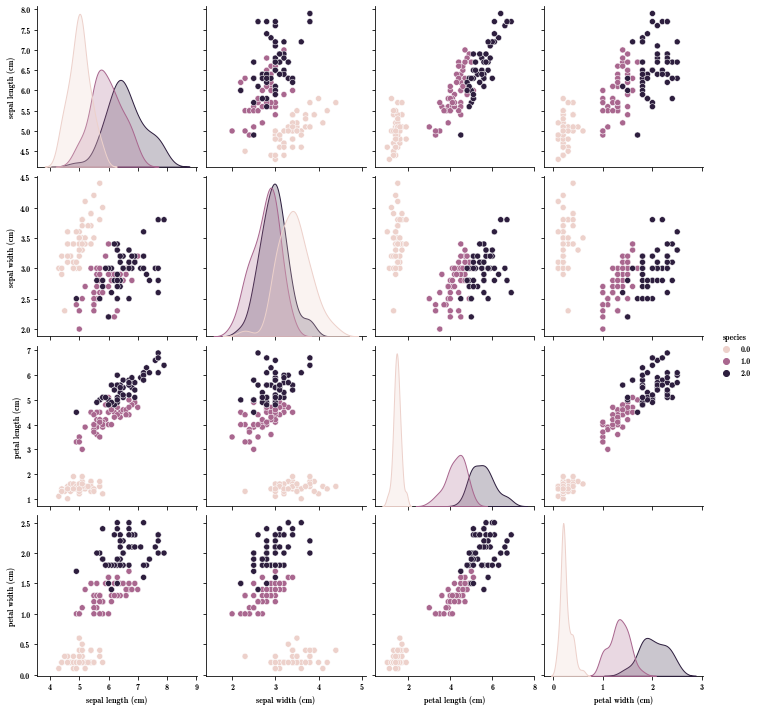

In [10]:
# 特征之间得关联性
g = sns.pairplot(data=x_df, hue='species')
plt.show()

In [11]:
# 数据集划分
x_train, x_val, y_train, y_val = train_test_split(x_total, y_total, test_size=0.33, random_state=5)  # 随机数种子：random_state x_train训练集 y_train训练集的标签 余下如此

# KNN
## 手动实现

In [12]:
#定义KNN类，用于分类，类中定义两个预测方法，分为考虑权重不考虑权重两种情况
class KNN:
    # K近邻算法
    def __init__(self, k):
        '''初始化方法 
           k:int: 邻居的个数
        '''
        self.k = k
    
    def fit(self, X, y):
        '''训练方法
            X : 待训练的样本特征（属性）
            y : 每个样本的目标值（标签）。
        '''
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        # 对样本数据进行预测
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))        # 欧氏距离 x - self.X：利用了python的广播机制 x减去self.X中每个元素
            index = dis.argsort()           # 根据值进行排序，然后返回这些值的索引值
            # 进行截断，只取前k个元素
            index = index[:self.k]
            # 返回数组中每个元素出现的次数,使用weights考虑权重，权重为距离的倒数
            count = np.bincount(self.y[index], weights= 1 / dis[index])     # 返回一个数组 weights是权重 y[i]*(1/dis[i])，相同的元素都合起来，距离大权重小，距离小，权重大。
            # 最大元素索引，就是出现次数最多的元素（就是找加权后最大的值）
            result.append(count.argmax())            
        return np.asarray(result)           # 返回的数据就是判断的结果标签

# 多分类评估
def evaluate(y_true, y_pred):
    print('准确率:', metrics.accuracy_score(y_true, y_pred))
    print('宏平均精确率:',metrics.precision_score(y_true, y_pred,average='macro'))
    print('微平均精确率:', metrics.precision_score(y_true, y_pred, average='micro'))
    print('加权平均精确率:', metrics.precision_score(y_true, y_pred, average='weighted'))

    print('宏平均召回率:',metrics.recall_score(y_true, y_pred,average='macro'))
    print('微平均召回率:',metrics.recall_score(y_true, y_pred,average='micro'))
    print('加权平均召回率:',metrics.recall_score(y_true, y_pred,average='micro'))

    print('宏平均F1-score:',metrics.f1_score(y_true, y_pred,labels=[1,2,3,4],average='macro'))
    print('微平均F1-score:',metrics.f1_score(y_true, y_pred,labels=[1,2,3,4],average='micro'))
    print('加权平均F1-score:',metrics.f1_score(y_true, y_pred,labels=[1,2,3,4],average='weighted'))

    print('混淆矩阵:\n',metrics.confusion_matrix(y_true, y_pred,labels=[1,2,3,4]))#混淆矩阵输出
    print('分类报告:\n', metrics.classification_report(y_true, y_pred,labels=[1,2,3,4]))#分类报告输出

# knn test
knn = KNN(3)
knn.fit(x_train, y_train)           # 训练模型
y_pred = knn.predict(x_val)         # 预测x_val
evaluate(y_val, y_pred)

准确率: 0.96
宏平均精确率: 0.9649122807017544
微平均精确率: 0.96
加权平均精确率: 0.9642105263157894
宏平均召回率: 0.9607843137254902
微平均召回率: 0.96
加权平均召回率: 0.96
宏平均F1-score: 0.4704861111111111
微平均F1-score: 0.9411764705882353
加权平均F1-score: 0.9409722222222222
混淆矩阵:
 [[15  2  0  0]
 [ 0 17  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
分类报告:
               precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94        17
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.94      0.94      0.94        34
   macro avg       0.47      0.47      0.47        34
weighted avg       0.95      0.94      0.94        34



## sklearn KNN函数
### 重要参数
| 参数            | 说明                                                         |
| --------------- | ------------------------------------------------------------ |
| `n_neighbors`   | k-NN 的 k 的值，选取最近的 k 个点。                          |
| `weights`       | 默认是 uniform，参数可以是 uniform、distance，也可以是用户自己定义的函数。uniform是均等的权重，就说所有的邻近点的权重都是相等的。distance是不均等的权重，距离近的点比距离远的点的影响大。 |
| `algorithm`     | 快速k近邻搜索算法，默认参数为auto，可以理解为算法自己决定合适的搜索算法。除此之外，用户也可以自己指定搜索算法ball_tree、kd_tree、brute方法进行搜索，brute是蛮力搜索，也就是线性扫描，当训练集很大时，计算非常耗时。kd_tree，构造kd树存储数据以便对其进行快速检索的树形数据结构，kd树也就是数据结构中的二叉树。以中值切分构造的树，每个结点是一个超矩形，在维数小于20时效率高。ball tree是为了克服kd树高纬失效而发明的，其构造过程是以质心C和半径r分割样本空间，每个节点是一个超球体 |
| `leaf_size`     | 默认是30，这个是构造的 kd 树和 ball 树的大小。会影响树构建的速度和搜索速度，同样也影响着存储树所需的内存大小。需要根据问题的性质选择最优的大小 |
| `metric`        | 用于距离度量，默认度量是 minkowski，也就是 p=2 的欧氏距离(欧几里德度量) |
| `p`             | 距离度量公式                                                 |
| `metric_params` | 距离公式的其他关键参数                                       |
| `n_jobs`        | 并行处理设置。默认为1，临近点搜索并行工作数。如果为 -1，那么 CPU 的所有 cores 都用于并行工作。 |


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
evaluate(y_val, y_pred)

准确率: 0.96
宏平均精确率: 0.9649122807017544
微平均精确率: 0.96
加权平均精确率: 0.9642105263157894
宏平均召回率: 0.9607843137254902
微平均召回率: 0.96
加权平均召回率: 0.96
宏平均F1-score: 0.4704861111111111
微平均F1-score: 0.9411764705882353
加权平均F1-score: 0.9409722222222222
混淆矩阵:
 [[15  2  0  0]
 [ 0 17  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
分类报告:
               precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94        17
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.94      0.94      0.94        34
   macro avg       0.47      0.47      0.47        34
weighted avg       0.95      0.94      0.94        34



# 决策树
## 重要参数
1. `criterion`
字符串类型，默认值为 `gini`。指定划分子树的评估标准：
 - `entropy`：基于信息熵的方法，即计算信息增益
 - `gini`：基于基尼系数（Gini Impurity）

  推荐设置为 ‘gini’，因为基尼系数的计算过程相对简单，而计算信息增益需要进行对数运算。使用信息增益作为划分标准时，在使用高纬度数据或者噪声很多的数据时容易过拟合。

2. `splitter`
  字符串类型，默认值为`best`。用于指定切分原则：
 - `best`：优先选择重要特征构造分支
 - `random`：构造分支的时候更随机，一定程度上减少过拟合
 
 默认的 `best` 适合样本量不大的时候，而如果样本数据量量非常大，此时决策树构建推荐 `random`。

3. `max_depth`

   数值型，默认值 `None`。这是与剪枝相关的参数，设置为 `None` 时，树的节点会一直分裂，直到：每个叶子都是“纯”的，或者叶子中包含⼩于 `min_sanples_split` 个样本。推荐从 `max_depth = 3` 尝试增加，观察是否应该继续加大深度。合适的取值可以是 `[3, 5, 8, 15, 25, 30, None]`

4. `min_samples_leaf`

   数值型，默认值1，指定每个叶子结点包含的最少的样本数。参数的取值除了整数之外，还可以是浮点数，此时（min_samples_leaf * n_samples）向下取整后的整数是每个节点的最小样本数。此参数设置的过小会导致过拟合，反之就会欠拟合。调整过程：
 - 对于类别不多的分类问题，设置为 1 通常是合理的选择
 - 当叶节点包含样本数量差异很大时，建议设置为浮点数
 - 推荐的取值可以是：`[1, 2, 5, 10]`

5. `min_samples_split`

   数值型，默认值 `2`，指定每个内部节点(非叶子节点)包含的最少的样本数。与 `min_samples_leaf` 这个参数类似，可以是整数也可以是浮点数。推荐的取值是：`[1, 2, 5, 10, 15, 100]`。

6. `max_features`

   可以为整数、浮点、字符或者 `None`，默认值为 `None`。此参数用于限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。

7. `class_weight`

   可以是列表、字典、或者字符串 `balanced`，还可以是默认值 `None`。这个参数主要是用于样本不平衡数据集，当设置为 `None` 时，所有类别样本权重都为1。也可以利用列表或者字典手动设置各个类别样本的权重，将样本较少的类别赋予更大的权重。当设置为 `balanced` 时，会自动根据样本出现的频率计算权重，即 `n_samples / (n_classes * np.bincount(y))`

## 模型训练与验证

In [14]:
# 构建决策树
dt_clf = tree.DecisionTreeClassifier(max_depth=5)# 深度为4层时有1个结果仍然模糊，5层就足够
dt_clf = dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_val)
evaluate(y_val, y_pred)

准确率: 0.94
宏平均精确率: 0.9421296296296297
微平均精确率: 0.94
加权平均精确率: 0.9409722222222223
宏平均召回率: 0.9411764705882352
微平均召回率: 0.94
加权平均召回率: 0.94
宏平均F1-score: 0.45584415584415583
微平均F1-score: 0.9117647058823528
加权平均F1-score: 0.9116883116883117
混淆矩阵:
 [[15  2  0  0]
 [ 1 16  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
分类报告:
               precision    recall  f1-score   support

           1       0.94      0.88      0.91        17
           2       0.89      0.94      0.91        17
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.91      0.91      0.91        34
   macro avg       0.46      0.46      0.46        34
weighted avg       0.91      0.91      0.91        34



## 决策树可视化

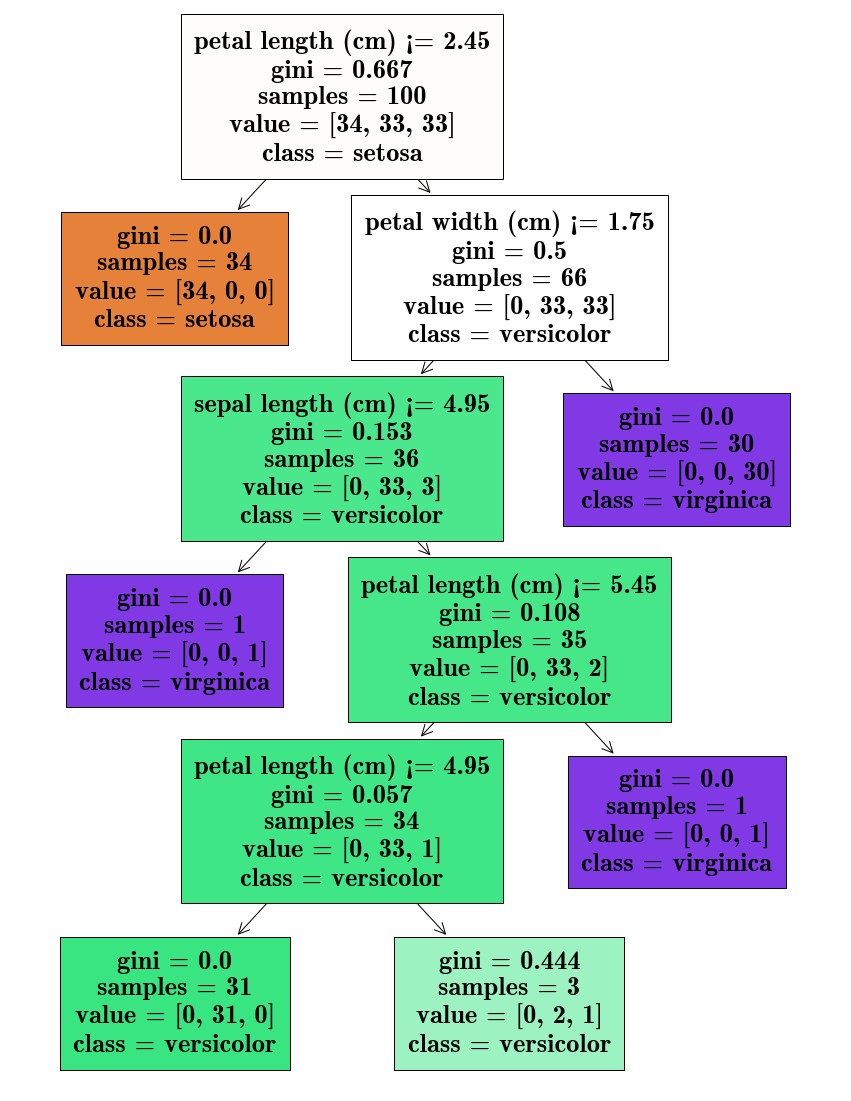

In [15]:
plt.figure(figsize=(15, 20))
tree.plot_tree(dt_clf,
               feature_names=feature_name, 
               class_names=label_name,
               filled=True)
plt.show()

## 分类边界可视化

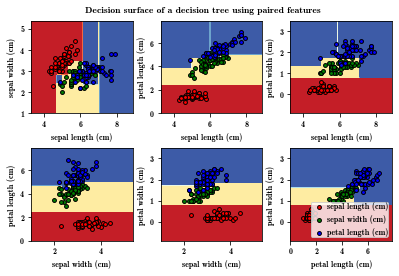

In [16]:
# plot the decision boundary(use two features)
def plot_clf_boundary(model, x_total, y_total, feature_name):       # model：训练的模型 
    n_classes = 3
    plot_step = 0.02        # 步长
    plot_colors = "rgb"
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                   [1, 2], [1, 3], [2, 3]]): #函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列
        plt.subplot(2, 3, pairidx + 1) # 2x3=6个图
        # pairidx 索引值
        # pair为pairidx对应的元素
        
        X = x_total[:, pair]
        y = y_total
        dt_clf = model.fit(X, y)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        # numpy.ravel() 返回的是视图，会影响原始矩阵
        Z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])   # np.c 中的c 是 column(列)的缩写，就是按列叠加两个矩阵，就是把两个矩阵左右组合，要求行数相等
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)         # 决策边界绘制

        plt.xlabel(feature_name[pair[0]])
        plt.ylabel(feature_name[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=feature_name[i],       # 画散点图
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='best', borderpad=0, handletextpad=0)
    plt.axis("tight")       # 设置足够大的限制以显示所有数据，然后禁用进一步的自动缩放
    plt.show()

plot_clf_boundary(tree.DecisionTreeClassifier(max_depth=5), x_total, y_total, feature_name)

# 随机森林
## 重要参数
1. 控制基评估器的参数
| 参数                    | 含义                                                         |
| ----------------------- | ------------------------------------------------------------ |
| `criterion`             | 不纯度的衡量指标，有基尼系数和信息熵两种选择                 |
| `max_depth`             | 树的最大深度，超过最大深度的树枝都会被剪掉                   |
| `min_samples_leaf`      | 一个节点在分支后的每个子节点都必须包含至少`min_samples_leaf`个训练样本，否则分支就不会发生 |
| `min_samples_split`     | 一个节点必须要包含至少`min_samples_split`个训练样本，这个节点才被允许分支，否则分支不会发生。 |
| `max_features`          | 限制分支时考虑的特振奋个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整。 |
| `min_impurity_decrease` | 限制信息增益的大小，信息增益小于设定数值的分支不会发生       |

2. `n_estimator`

  森林中树木的数量，即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，`n_estimator`越大，模型的效果越好。但相应的，任何模型都有决策边界，`n_estimator`达到一定程度后，随机森林的精确性往往不再上升或开始波动，并且,n_estimator越大，需要的计算量和内存也就越大，训练的时间也会越来越长。

## 模型训练与验证

In [17]:
rf_clf = RandomForestClassifier(n_estimators=20, oob_score=True)
rf_clf = rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_val)
evaluate(y_val, y_pred)

准确率: 0.96
宏平均精确率: 0.9607843137254902
微平均精确率: 0.96
加权平均精确率: 0.96
宏平均召回率: 0.9607843137254902
微平均召回率: 0.96
加权平均召回率: 0.96
宏平均F1-score: 0.47058823529411764
微平均F1-score: 0.9411764705882353
加权平均F1-score: 0.9411764705882353
混淆矩阵:
 [[16  1  0  0]
 [ 1 16  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
分类报告:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        17
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.94      0.94      0.94        34
   macro avg       0.47      0.47      0.47        34
weighted avg       0.94      0.94      0.94        34



## 分类边界可视化

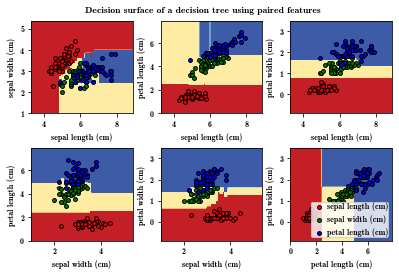

In [18]:
plot_clf_boundary(RandomForestClassifier(n_estimators=10, oob_score=True), x_total, y_total, feature_name)

# GBDT分类
## 重要参数
  自行探索
## 模型训练与验证

In [19]:
gbdt_clf = GradientBoostingClassifier(n_estimators=50)
gbdt_clf = gbdt_clf.fit(x_train,y_train)
y_pred = gbdt_clf.predict(x_val)
evaluate(y_val, y_pred)

准确率: 0.96
宏平均精确率: 0.9607843137254902
微平均精确率: 0.96
加权平均精确率: 0.96
宏平均召回率: 0.9607843137254902
微平均召回率: 0.96
加权平均召回率: 0.96
宏平均F1-score: 0.47058823529411764
微平均F1-score: 0.9411764705882353
加权平均F1-score: 0.9411764705882353
混淆矩阵:
 [[16  1  0  0]
 [ 1 16  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
分类报告:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        17
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.94      0.94      0.94        34
   macro avg       0.47      0.47      0.47        34
weighted avg       0.94      0.94      0.94        34



## 分类边界可视化

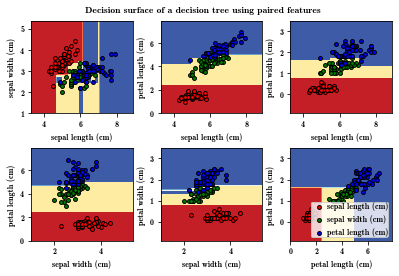

In [20]:
plot_clf_boundary(GradientBoostingClassifier(n_estimators=50), x_total, y_total, feature_name)

# 朴素贝叶斯分类
## 重要参数
朴素贝叶斯一共有三种方法，分别是高斯朴素贝叶斯、多项式分布贝叶斯、伯努利朴素贝叶斯。三种分类方法其实就是对应三种不同的数据分布类型。多项式模型朴素贝叶斯和伯努利模型朴素贝叶斯常用在文本分类问题中，高斯分布的朴素贝叶斯主要用于连续变量中,且假设连续变量是服从正太分布的。
1. 高斯朴素贝叶斯 `class sklearn.naive_bayes.GaussianNB(priors=None)`
  - `priors`：先验概率大小，如果没有给定，模型则根据样本数据自己计算（利用极大似然法）
 
2. 多项式分布贝叶斯 `class sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)`
  - `alpha`：先验平滑因子，默认等于1，当等于1时表示拉普拉斯平滑
  - `fit_prior`：是否去学习类的先验概率，默认是 True
  - `class_prior`：各个类别的先验概率，如果没有指定，则模型会根据数据自动学习， 每个类别的先验概率相同，等于类标记总个数 N 分之一
  
3. 伯努利朴素贝叶斯 `class sklearn.naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)`
  - `alpha`：平滑因子，与多项式中的 `alpha` 一致。
  - `binarize`：样本特征二值化的阈值，默认是0。如果不输入，则模型会认为所有特征都已经是二值化形式了；如果输入具体的值，则模型会把大于该值的部分归为一类，小于的归为另一类。
  - `fit_prior`：是否去学习类的先验概率，默认是True
  - `class_prior`：各个类别的先验概率，如果没有指定，则模型会根据数据自动学习， 每个类别的先验概率相同，等于类标记总个数 N 分之一。



## 模型训练与验证

In [21]:
nb_clf = naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nb_clf = nb_clf.fit(x_train,y_train)
y_pred = nb_clf.predict(x_val)
evaluate(y_val, y_pred)

准确率: 0.96
宏平均精确率: 0.9607843137254902
微平均精确率: 0.96
加权平均精确率: 0.96
宏平均召回率: 0.9607843137254902
微平均召回率: 0.96
加权平均召回率: 0.96
宏平均F1-score: 0.47058823529411764
微平均F1-score: 0.9411764705882353
加权平均F1-score: 0.9411764705882353
混淆矩阵:
 [[16  1  0  0]
 [ 1 16  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]
分类报告:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.94      0.94      0.94        17
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.94      0.94      0.94        34
   macro avg       0.47      0.47      0.47        34
weighted avg       0.94      0.94      0.94        34



## 分类边界可视化

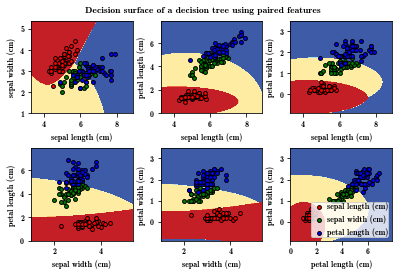

In [22]:
plot_clf_boundary(naive_bayes.GaussianNB(), x_total, y_total, feature_name)